In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from sklearn.preprocessing import LabelEncoder
warnings.filterwarnings("ignore")


In [3]:
# Reading Bigdatamart Database
Train=pd.read_csv("bigdatamart_Train.csv")
Train

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [4]:
Train


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [5]:
Test=pd.read_csv("bigdatamart_Test.csv")
Test

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3
...,...,...,...,...,...,...,...,...,...,...,...
5676,FDB58,10.500,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1
5677,FDD47,7.600,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2
5678,NCO17,10.000,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1
5679,FDJ26,15.300,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1


In [6]:
# Train Database columns 
Train.columns


Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [7]:
# Test Database Columns 
Test.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type'],
      dtype='object')

In [8]:
# Shape of Test and Train Database 
print("Train Database shape :",Train.shape)
print("\n")
print("Test Database shape :",Test.shape)
print("\n")



Train Database shape : (8523, 12)


Test Database shape : (5681, 11)




In [9]:
#Finding Null values in database
Train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [10]:
Test.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

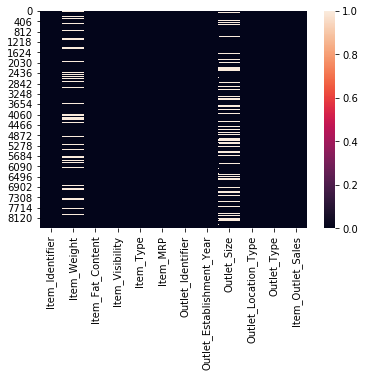

In [11]:
#Making Heatmap of Null values
sns.heatmap(Train.isnull())

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text xticklabel objects>)

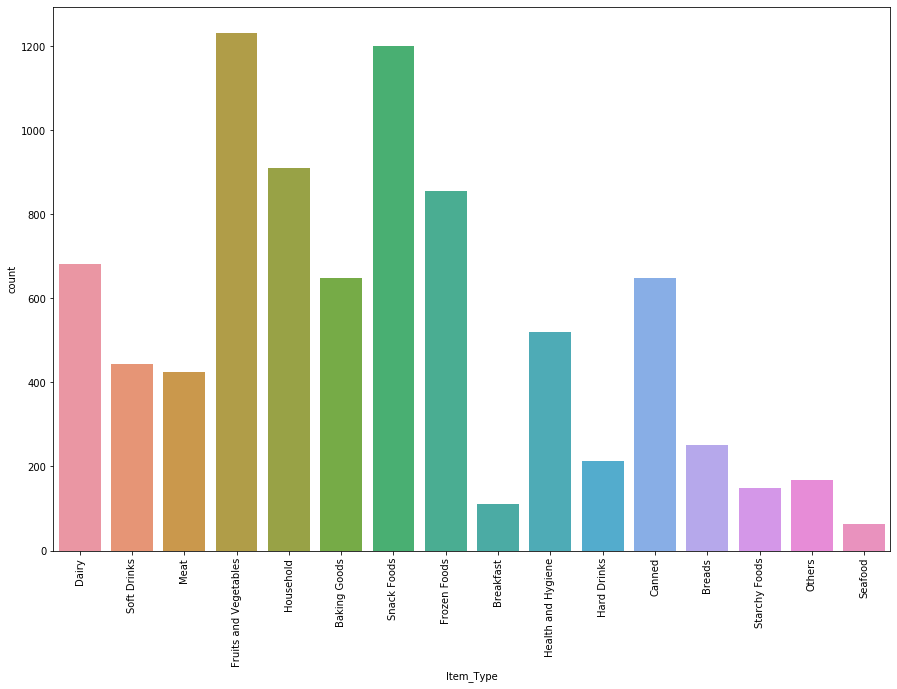

In [12]:
#Plotting quantity of each types of Item.
plt.figure(figsize=(15,10))
sns.countplot(Train.Item_Type)
plt.xticks(rotation=90)

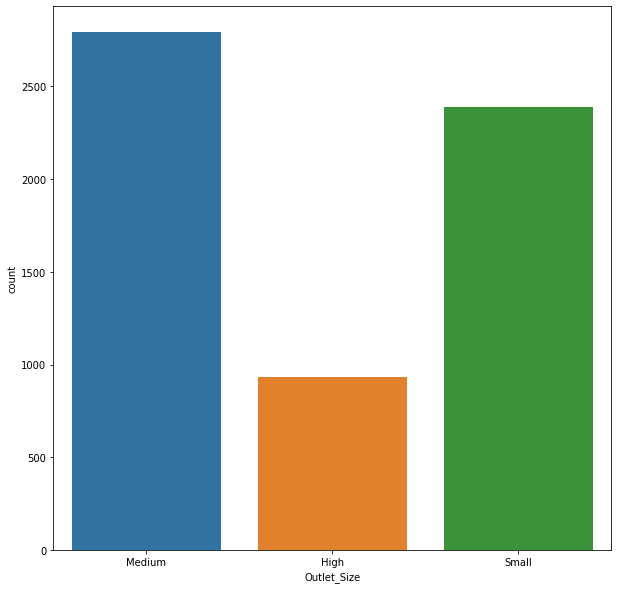

In [13]:
#Ploting count of Outlet size of item
plt.figure(figsize=(10,10))
sns.countplot(Train.Outlet_Size)

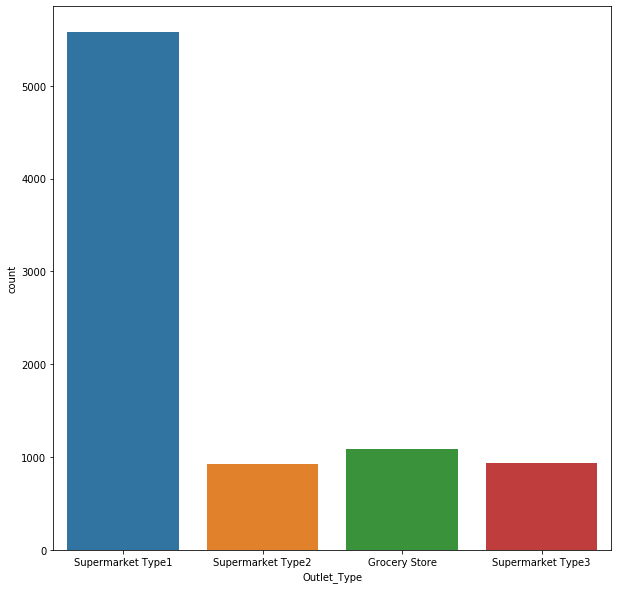

In [14]:
plt.figure(figsize=(10,10))
sns.countplot(Train.Outlet_Type)


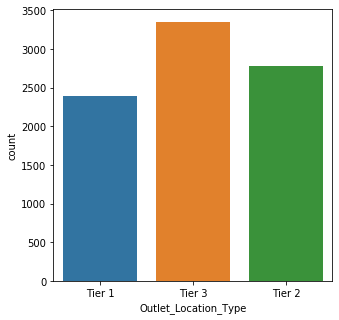

In [15]:
plt.figure(figsize=(5,5))
sns.countplot(Train.Outlet_Location_Type)

# Multivariate analysis

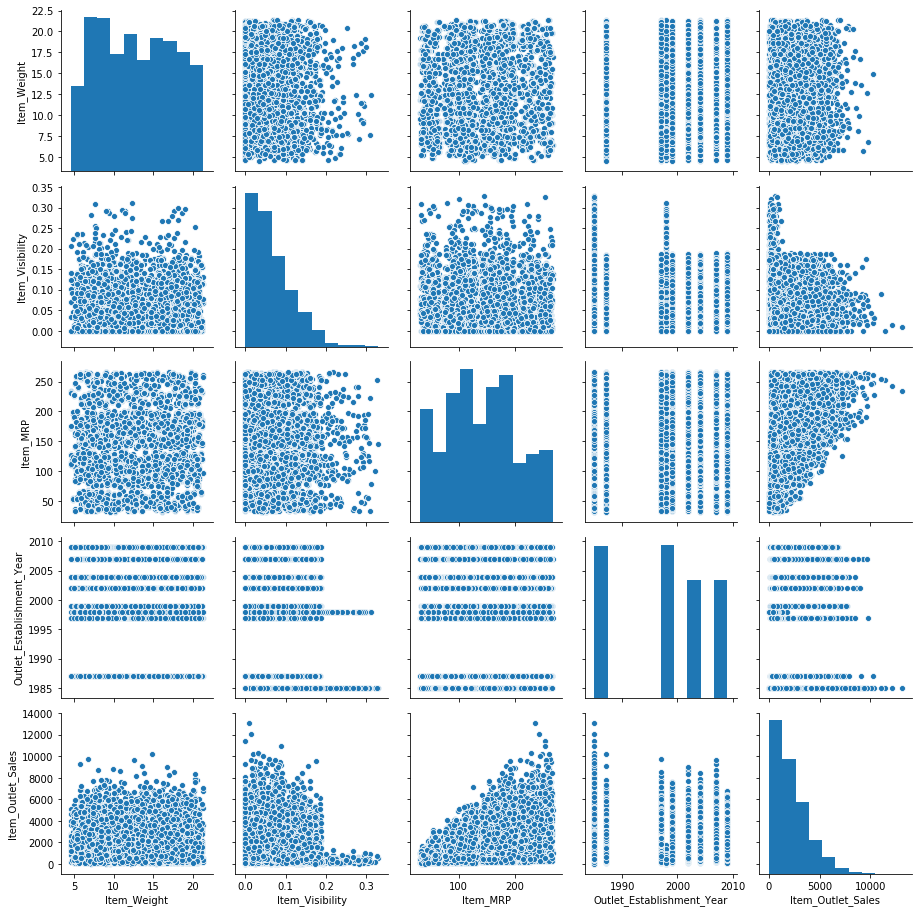

In [16]:
sns.pairplot(Train)

Item_Weight                     AxesSubplot(0.125,0.657941;0.0945122x0.222059)
Item_Visibility              AxesSubplot(0.238415,0.657941;0.0945122x0.222059)
Item_MRP                     AxesSubplot(0.351829,0.657941;0.0945122x0.222059)
Outlet_Establishment_Year    AxesSubplot(0.465244,0.657941;0.0945122x0.222059)
Item_Outlet_Sales            AxesSubplot(0.578659,0.657941;0.0945122x0.222059)
dtype: object

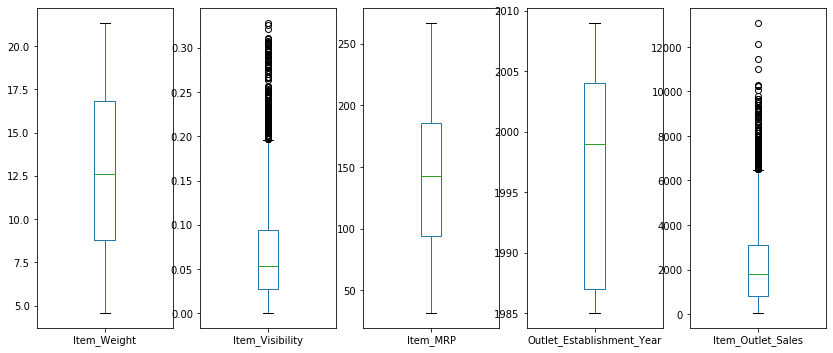

In [17]:
# Ploting Boxplot of the columns 
Train.plot(kind='box',subplots=True,layout=(3,7),figsize=(20,20))

# Univarate analysis

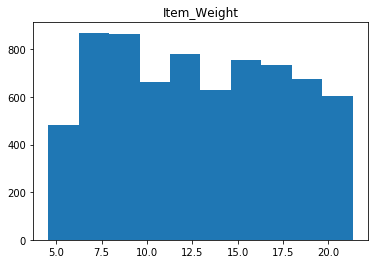

In [18]:
plt.hist(Train["Item_Weight"],bins=10)
plt.title("Item_Weight")

plt.show()

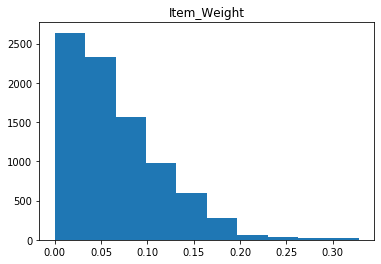

In [19]:
plt.hist(Train["Item_Visibility"],bins=10)
plt.title("Item_Weight")

plt.show()

{'bodies': [<matplotlib.collections.PolyCollection at 0x257012cab48>],
 'cmaxes': <matplotlib.collections.LineCollection at 0x257012b2808>,
 'cmins': <matplotlib.collections.LineCollection at 0x257012d1a08>,
 'cbars': <matplotlib.collections.LineCollection at 0x257012d1ec8>}

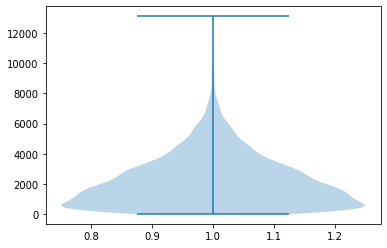

In [20]:
plt.violinplot(Train["Item_Outlet_Sales"])

{'bodies': [<matplotlib.collections.PolyCollection at 0x25701337e08>],
 'cmaxes': <matplotlib.collections.LineCollection at 0x25701337a48>,
 'cmins': <matplotlib.collections.LineCollection at 0x25701340e88>,
 'cbars': <matplotlib.collections.LineCollection at 0x25701340e08>}

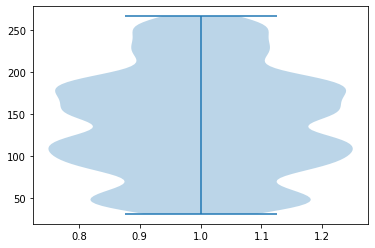

In [21]:
plt.violinplot(Train["Item_MRP"])

# Adjusting Nan values in different columns

In [22]:
Train["Item_Weight"].fillna(Train['Item_Weight'].mean(),inplace=True)

In [23]:
Train['Outlet_Size'].fillna("Medium",inplace=True)

In [24]:
Train.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [25]:
Test["Item_Weight"].fillna(Test['Item_Weight'].mean(),inplace=True)

In [26]:
Test['Outlet_Size'].fillna("Medium",inplace=True)

In [27]:
Test.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

In [28]:
#Using Label Encoder to convert all categorial data into numbers
le=LabelEncoder()
list1=['Item_Fat_Content','Item_Type','Outlet_Size','Outlet_Location_Type','Outlet_Type']
for val in list1:
    Train[val]=le.fit_transform(Train[val].astype(str))

In [29]:
le=LabelEncoder()
list1=['Item_Fat_Content','Item_Type','Outlet_Size','Outlet_Location_Type','Outlet_Type']
for val in list1:
    Test[val]=le.fit_transform(Test[val].astype(str))

In [30]:
Train

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,1,0.016047,4,249.8092,OUT049,1999,1,0,1,3735.1380
1,DRC01,5.920,2,0.019278,14,48.2692,OUT018,2009,1,2,2,443.4228
2,FDN15,17.500,1,0.016760,10,141.6180,OUT049,1999,1,0,1,2097.2700
3,FDX07,19.200,2,0.000000,6,182.0950,OUT010,1998,1,2,0,732.3800
4,NCD19,8.930,1,0.000000,9,53.8614,OUT013,1987,0,2,1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,1,0.056783,13,214.5218,OUT013,1987,0,2,1,2778.3834
8519,FDS36,8.380,2,0.046982,0,108.1570,OUT045,2002,1,1,1,549.2850
8520,NCJ29,10.600,1,0.035186,8,85.1224,OUT035,2004,2,1,1,1193.1136
8521,FDN46,7.210,2,0.145221,13,103.1332,OUT018,2009,1,2,2,1845.5976


In [31]:
Train1 = Train.drop(["Item_Identifier","Outlet_Identifier","Outlet_Establishment_Year"],axis = 1)
Train1

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.300,1,0.016047,4,249.8092,1,0,1,3735.1380
1,5.920,2,0.019278,14,48.2692,1,2,2,443.4228
2,17.500,1,0.016760,10,141.6180,1,0,1,2097.2700
3,19.200,2,0.000000,6,182.0950,1,2,0,732.3800
4,8.930,1,0.000000,9,53.8614,0,2,1,994.7052
...,...,...,...,...,...,...,...,...,...
8518,6.865,1,0.056783,13,214.5218,0,2,1,2778.3834
8519,8.380,2,0.046982,0,108.1570,1,1,1,549.2850
8520,10.600,1,0.035186,8,85.1224,2,1,1,1193.1136
8521,7.210,2,0.145221,13,103.1332,1,2,2,1845.5976


In [32]:
Test1 = Test.drop(["Item_Identifier","Outlet_Identifier","Outlet_Establishment_Year"],axis = 1)
Test1

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,20.750000,1,0.007565,13,107.8622,1,0,1
1,8.300000,4,0.038428,4,87.3198,1,1,1
2,14.600000,1,0.099575,11,241.7538,1,2,0
3,7.315000,1,0.015388,13,155.0340,1,1,1
4,12.695633,2,0.118599,4,234.2300,1,2,3
...,...,...,...,...,...,...,...,...
5676,10.500000,2,0.013496,13,141.3154,2,0,1
5677,7.600000,2,0.142991,15,169.1448,1,2,2
5678,10.000000,1,0.073529,8,118.7440,1,1,1
5679,15.300000,2,0.000000,3,214.6218,1,1,1


# Removing Outliners and Skewness

In [33]:
from scipy.stats import zscore
z=np.abs(zscore(Train1))
z

array([[0.84187169, 0.57284357, 0.97073217, ..., 1.36933384, 0.25265831,
        0.910601  ],
       [1.64170589, 0.97809218, 0.90811123, ..., 1.09156913, 1.00297245,
        1.01844035],
       [1.09855449, 0.57284357, 0.95691733, ..., 1.36933384, 0.25265831,
        0.04923754],
       ...,
       [0.53424315, 0.57284357, 0.59978449, ..., 0.13888236, 0.25265831,
        0.57909963],
       [1.33644372, 0.97809218, 1.53287976, ..., 1.09156913, 1.00297245,
        0.19672492],
       [0.45963367, 0.57284357, 0.41193591, ..., 1.36933384, 0.25265831,
        0.82959407]])

In [34]:
from scipy.stats import zscore
z1=np.abs(zscore(Test1))
z1

array([[1.89745979, 0.57528374, 1.13407715, ..., 0.28473712, 1.369215  ,
        0.25276858],
       [1.03552991, 4.10469757, 0.53185019, ..., 0.28473712, 0.1388274 ,
        0.25276858],
       [0.44863355, 0.57528374, 0.6613164 , ..., 0.28473712, 1.0915602 ,
        1.50799439],
       ...,
       [0.63504136, 0.57528374, 0.15307374, ..., 0.28473712, 0.1388274 ,
        0.25276858],
       [0.6135406 , 0.98471003, 1.28168987, ..., 0.28473712, 0.1388274 ,
        0.25276858],
       [0.75283211, 0.98471003, 0.76171558, ..., 0.28473712, 0.1388274 ,
        0.25276858]])

In [35]:
Train2=Train1[(z<3).all(axis=1)]

In [36]:
Test2=Test1[(z1<3).all(axis=1)]

In [37]:
Train2

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.300,1,0.016047,4,249.8092,1,0,1,3735.1380
1,5.920,2,0.019278,14,48.2692,1,2,2,443.4228
2,17.500,1,0.016760,10,141.6180,1,0,1,2097.2700
3,19.200,2,0.000000,6,182.0950,1,2,0,732.3800
4,8.930,1,0.000000,9,53.8614,0,2,1,994.7052
...,...,...,...,...,...,...,...,...,...
8518,6.865,1,0.056783,13,214.5218,0,2,1,2778.3834
8519,8.380,2,0.046982,0,108.1570,1,1,1,549.2850
8520,10.600,1,0.035186,8,85.1224,2,1,1,1193.1136
8521,7.210,2,0.145221,13,103.1332,1,2,2,1845.5976


# Splitting Data into target and Input

In [38]:
x=Train2.iloc[:,0:-1]
x

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,9.300,1,0.016047,4,249.8092,1,0,1
1,5.920,2,0.019278,14,48.2692,1,2,2
2,17.500,1,0.016760,10,141.6180,1,0,1
3,19.200,2,0.000000,6,182.0950,1,2,0
4,8.930,1,0.000000,9,53.8614,0,2,1
...,...,...,...,...,...,...,...,...
8518,6.865,1,0.056783,13,214.5218,0,2,1
8519,8.380,2,0.046982,0,108.1570,1,1,1
8520,10.600,1,0.035186,8,85.1224,2,1,1
8521,7.210,2,0.145221,13,103.1332,1,2,2


In [39]:
y=Train2.iloc[:,-1]
y

0       3735.1380
1        443.4228
2       2097.2700
3        732.3800
4        994.7052
          ...    
8518    2778.3834
8519     549.2850
8520    1193.1136
8521    1845.5976
8522     765.6700
Name: Item_Outlet_Sales, Length: 8222, dtype: float64

In [40]:
x.skew()

Item_Weight             0.087821
Item_Fat_Content        0.291106
Item_Visibility         0.794506
Item_Type               0.094578
Item_MRP                0.139153
Outlet_Size            -0.089519
Outlet_Location_Type   -0.202794
Outlet_Type             0.957163
dtype: float64

In [41]:
# standard scaling data 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
print(scaler.fit(x))

StandardScaler(copy=True, with_mean=True, with_std=True)


In [42]:
x.skew()

Item_Weight             0.087821
Item_Fat_Content        0.291106
Item_Visibility         0.794506
Item_Type               0.094578
Item_MRP                0.139153
Outlet_Size            -0.089519
Outlet_Location_Type   -0.202794
Outlet_Type             0.957163
dtype: float64

# Importing Necessary libraries

In [43]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import Lasso

In [44]:

def maxr2_score(regr,x,y):
    max_r_score=0
    for i in range(42,100):
        x_train,x_test,y_train,y_test=train_test_split(x,y,random_state= i ,test_size=0.20)
        regr.fit(x,y)
        y_pred=regr.predict(x_test)
        r2_scr=r2_score(y_test,y_pred)
        print("r2 score corresponding to",i,"is",r2_scr)
        if r2_scr>max_r_score:
            max_r_score=r2_scr
            final_i=i
    print("max r2 score corresponding to",final_i,"is",max_r_score)
    return final_i


# Using different Algorithim to find best R2 score value

In [45]:
# Using Linear Regression algorithim 
from sklearn.linear_model import LinearRegression
lreg=LinearRegression()
r_state=maxr2_score(lreg,x,y)

r2 score corresponding to 42 is 0.5171417488677442
r2 score corresponding to 43 is 0.5083184625659748
r2 score corresponding to 44 is 0.5087639489468786
r2 score corresponding to 45 is 0.4905630169432106
r2 score corresponding to 46 is 0.4785774581751415
r2 score corresponding to 47 is 0.47127342167006525
r2 score corresponding to 48 is 0.5122299637271998
r2 score corresponding to 49 is 0.5088066750232636
r2 score corresponding to 50 is 0.4785715726279318
r2 score corresponding to 51 is 0.4864990470651641
r2 score corresponding to 52 is 0.5114540256480794
r2 score corresponding to 53 is 0.47392345186445417
r2 score corresponding to 54 is 0.4983970582957039
r2 score corresponding to 55 is 0.4951046925508178
r2 score corresponding to 56 is 0.5015143536748818
r2 score corresponding to 57 is 0.5078963997755462
r2 score corresponding to 58 is 0.48964012746624774
r2 score corresponding to 59 is 0.5063726816188916
r2 score corresponding to 60 is 0.4986114480933558
r2 score corresponding to 61

In [46]:
from sklearn.model_selection import cross_val_score
print("Mean r2 score for Linear Regression:",cross_val_score(lreg,x,y,cv=5,scoring="r2").mean())
print("standard deviation in r2 score for Linear Regression",cross_val_score(lreg,x,y,cv=5,scoring="r2").std())
print()

Mean r2 score for Linear Regression: 0.4935917619953586
standard deviation in r2 score for Linear Regression 0.009746551298358209



In [47]:
# using Grid search CV to find best  parameters of KNN ,Lasso ,Decision Tree regressor .
knn=KNeighborsRegressor()
parameters={'n_neighbors':(1,10)}
gd=GridSearchCV(knn,parameters)
gd.fit(x,y)
print(gd.best_params_)
print("\n")

lsreg=Lasso()
parameters={"alpha":[0.001,0.01,0.1,1]}
gd=GridSearchCV(lsreg,parameters)
gd.fit(x,y)
print(gd.best_params_)
print("\n")

dtc=DecisionTreeRegressor()
parameters={'criterion':('mse', 'friedman_mse', 'mae')}
gd=GridSearchCV(dtc,parameters)
gd.fit(x,y)
print(gd.best_params_)
print("\n")


{'n_neighbors': 10}


{'alpha': 0.01}


{'criterion': 'mse'}




In [48]:
knn=KNeighborsRegressor(n_neighbors=10)
i=maxr2_score(knn,x,y)




r2 score corresponding to 42 is 0.5151243834539634
r2 score corresponding to 43 is 0.4821367214916411
r2 score corresponding to 44 is 0.5078898823008465
r2 score corresponding to 45 is 0.49676204643273614
r2 score corresponding to 46 is 0.46824285423796785
r2 score corresponding to 47 is 0.4935555020414166
r2 score corresponding to 48 is 0.5105948526337505
r2 score corresponding to 49 is 0.5068918191146419
r2 score corresponding to 50 is 0.4624674051718094
r2 score corresponding to 51 is 0.4955777902459614
r2 score corresponding to 52 is 0.49887716422465256
r2 score corresponding to 53 is 0.5043022629718046
r2 score corresponding to 54 is 0.4923343539245444
r2 score corresponding to 55 is 0.48856063431499164
r2 score corresponding to 56 is 0.510582932160023
r2 score corresponding to 57 is 0.5275146829459306
r2 score corresponding to 58 is 0.5032561181881375
r2 score corresponding to 59 is 0.5077765202837927
r2 score corresponding to 60 is 0.5144635298035796
r2 score corresponding to 61

In [49]:
from sklearn.model_selection import cross_val_score
print("Mean r2 score for KNeighbor  Regression:",cross_val_score(knn,x,y,cv=5,scoring="r2").mean())
print("standard deviation in r2 score for KNeighbor   Regression",cross_val_score(knn,x,y,cv=5,scoring="r2").std())


Mean r2 score for KNeighbor  Regression: 0.3659366109925149
standard deviation in r2 score for KNeighbor   Regression 0.017065905877028383


In [50]:
## Finding best r2 score value for  Lasso Regressor
lsreg=Lasso(alpha=0.001)
i=maxr2_score(lsreg,x,y)


r2 score corresponding to 42 is 0.5171410882884054
r2 score corresponding to 43 is 0.5083185476587978
r2 score corresponding to 44 is 0.5087634383721364
r2 score corresponding to 45 is 0.4905632897778204
r2 score corresponding to 46 is 0.478577337428546
r2 score corresponding to 47 is 0.4712742272084741
r2 score corresponding to 48 is 0.5122302641294518
r2 score corresponding to 49 is 0.5088071640594045
r2 score corresponding to 50 is 0.4785711770089518
r2 score corresponding to 51 is 0.4864990265727893
r2 score corresponding to 52 is 0.5114537263354191
r2 score corresponding to 53 is 0.4739236395347104
r2 score corresponding to 54 is 0.49839707211798534
r2 score corresponding to 55 is 0.49510431599296734
r2 score corresponding to 56 is 0.5015149282307929
r2 score corresponding to 57 is 0.5078967773198992
r2 score corresponding to 58 is 0.4896397010484128
r2 score corresponding to 59 is 0.5063725270072268
r2 score corresponding to 60 is 0.4986111856996642
r2 score corresponding to 61 i

In [51]:
from sklearn.model_selection import cross_val_score
print("Mean r2 score for Lasso Regression:",cross_val_score(lsreg,x,y,cv=5,scoring="r2").mean())
print("standard deviation in r2 score for Lasso Regression",cross_val_score(lsreg,x,y,cv=5,scoring="r2").std())


Mean r2 score for Lasso Regression: 0.493591778939609
standard deviation in r2 score for Lasso Regression 0.009746546817381966


In [52]:
## Finding best r2 score value for DecisionTreeRegressor
dtc=DecisionTreeRegressor(criterion = 'friedman_mse')
i=maxr2_score(dtc,x,y)


r2 score corresponding to 42 is 1.0
r2 score corresponding to 43 is 1.0
r2 score corresponding to 44 is 1.0
r2 score corresponding to 45 is 1.0
r2 score corresponding to 46 is 1.0
r2 score corresponding to 47 is 1.0
r2 score corresponding to 48 is 1.0
r2 score corresponding to 49 is 1.0
r2 score corresponding to 50 is 1.0
r2 score corresponding to 51 is 1.0
r2 score corresponding to 52 is 1.0
r2 score corresponding to 53 is 1.0
r2 score corresponding to 54 is 1.0
r2 score corresponding to 55 is 1.0
r2 score corresponding to 56 is 1.0
r2 score corresponding to 57 is 1.0
r2 score corresponding to 58 is 1.0
r2 score corresponding to 59 is 1.0
r2 score corresponding to 60 is 1.0
r2 score corresponding to 61 is 1.0
r2 score corresponding to 62 is 1.0
r2 score corresponding to 63 is 1.0
r2 score corresponding to 64 is 1.0
r2 score corresponding to 65 is 1.0
r2 score corresponding to 66 is 1.0
r2 score corresponding to 67 is 1.0
r2 score corresponding to 68 is 1.0
r2 score corresponding to 69

In [53]:
from sklearn.model_selection import cross_val_score
print("Mean r2 score for DecisionTreeRegressor :",cross_val_score(dtc,x,y,cv=5,scoring="r2").mean())
print("standard deviation in r2 score for DecisionTreeRegressor",cross_val_score(dtc,x,y,cv=5,scoring="r2").std())


Mean r2 score for DecisionTreeRegressor : 0.1655670560309764
standard deviation in r2 score for DecisionTreeRegressor 0.015280631753878242


In [54]:
from sklearn.linear_model import ElasticNet
enr=ElasticNet()
parametors={"alpha":[0.001,0.01,0.1,1]}
clf=GridSearchCV(enr,parametors,cv=10)
clf.fit(x,y)
clf.best_params_

{'alpha': 0.001}

In [55]:
## Finding best r2 score value for ElasticNet 
enr=ElasticNet(alpha=0.001)
i=maxr2_score(enr,x,y)

r2 score corresponding to 42 is 0.5167858502461722
r2 score corresponding to 43 is 0.5083257887109077
r2 score corresponding to 44 is 0.5084688814576224
r2 score corresponding to 45 is 0.49067872954759684
r2 score corresponding to 46 is 0.47849530371876403
r2 score corresponding to 47 is 0.4715846905122232
r2 score corresponding to 48 is 0.5123447415936528
r2 score corresponding to 49 is 0.508984593001916
r2 score corresponding to 50 is 0.4783202267136396
r2 score corresponding to 51 is 0.48648321310445786
r2 score corresponding to 52 is 0.5112800286525108
r2 score corresponding to 53 is 0.4739737146337628
r2 score corresponding to 54 is 0.4983669377538217
r2 score corresponding to 55 is 0.49488332856326234
r2 score corresponding to 56 is 0.5017118031606314
r2 score corresponding to 57 is 0.5080144247666122
r2 score corresponding to 58 is 0.48935245780244885
r2 score corresponding to 59 is 0.5062405410523789
r2 score corresponding to 60 is 0.4983896990105726
r2 score corresponding to 6

In [56]:
print("Mean r2 score for Elastic net Regression:",cross_val_score(enr,x,y,cv=5,scoring="r2").mean())
print("standard deviation in r2 score for Elastic net Regression",cross_val_score(enr,x,y,cv=5,scoring="r2").std())

Mean r2 score for Elastic net Regression: 0.493571916378187
standard deviation in r2 score for Elastic net Regression 0.009778880404431613


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
import warnings
warnings.filterwarnings("ignore")
gbr=GradientBoostingRegressor()
parameters={"learning_rate":[0.001,0.01,0.1,1],"n_estimators":[10,100,500,1000]}
clf=GridSearchCV(gbr,parameters,cv=5)
clf.fit(x,y)
clf.best_params_

In [ ]:
## Finding best r2 score value for  GradientBoostingRegressor
gbr=GradientBoostingRegressor(learning_rate=0.01,n_estimators=500)
i=maxr2_score(gbr,x,y)

In [ ]:
gbr=GradientBoostingRegressor(learning_rate=0.01,n_estimators=500)
print("Mean r2 score for gradient boosting Regression:",cross_val_score(gbr,x,y,cv=5,scoring="r2").mean())
print("standard deviation in r2 score for gradient boosting Regression",cross_val_score(gbr,x,y,cv=5,scoring="r2").std()) 

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor()
parameters={"n_estimators":[10,100,250,500],"max_features": ["auto", "sqrt", "log2"]}
clf=GridSearchCV(rfr,parameters,cv=5)
clf.fit(x,y)
clf.best_params_

In [ ]:
## Finding best r2 score value for  RandomForestRegressor
rfr=RandomForestRegressor(max_features='sqrt',n_estimators=250)
i=maxr2_score(rfr,x,y)

In [ ]:
print("Mean r2 score for RandomForestRegressor :",cross_val_score(rfr,x,y,cv=10,scoring="r2").mean())
print("standard deviation in r2 score for RandomForestRegressor ",cross_val_score(rfr,x,y,cv=5,scoring="r2").std()) 

# we selected Random forest regressor  as our final model 

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=88,test_size=0.20)
rfr=RandomForestRegressor(max_features='sqrt',n_estimators=250)
rfr.fit(x,y)
y_pred=rfr.predict(x_test)
y_pred

In [ ]:
import numpy as np
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
print("RMSE is: ",np.sqrt(mean_squared_error(y_test,y_pred)))
print("r2_score is:",r2_score(y_test,y_pred))

# Saving Model

In [ ]:
from sklearn.externals import joblib
joblib.dump(gbr,"bigmart.pkl")

# Loading Model 

In [ ]:
model=joblib.load('bigmart.pkl')

# Using Model to predict data 

In [ ]:
model.predict(Test2)